In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import scipy.stats as stats
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load the dataset
file_path = 'LoanData_Raw_v1.0.csv'
loan_data = pd.read_csv(file_path)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Drop duplicate rows
loan_data = loan_data.drop_duplicates()

# Drop rows with missing values
cleaned_data = loan_data.dropna()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Encode the `default` column: convert '1'/'0' to 1/0
cleaned_data.loc[:, 'default'] = cleaned_data['default'].map({'1': 1, '0': 0})

# Verify unique values in the 'default' column
print("Unique values in 'default' column:", cleaned_data['default'].unique())

# Filter out invalid `default` values
cleaned_data = cleaned_data[cleaned_data['default'].isin([0, 1])]

Unique values in 'default' column: [1.0 0.0 nan]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

print("\n--- Hypothesis Testing ---")
# Split income data into defaulters and non-defaulters
income_default = cleaned_data[cleaned_data['default'] == 1]['income']
income_no_default = cleaned_data[cleaned_data['default'] == 0]['income']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(income_default, income_no_default, equal_var=False)

print("\nT-Test: Income vs. Default Status")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject the null hypothesis. Income significantly differs between defaulters and non-defaulters.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in income.")


--- Hypothesis Testing ---

T-Test: Income vs. Default Status
T-Statistic: -1.5973, P-Value: 0.1115
Result: Fail to reject the null hypothesis. No significant difference in income.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Create a contingency table
edu_default_table = pd.crosstab(cleaned_data['ed'], cleaned_data['default'])

# Perform chi-square test
chi2_stat, chi2_p, dof, expected = stats.chi2_contingency(edu_default_table)

print("\nChi-Square Test: Education Level vs. Default Status")
print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-Value: {chi2_p:.4f}")

if chi2_p < 0.05:
    print("Result: Reject the null hypothesis. Education level significantly affects default rates.")
else:
    print("Result: Fail to reject the null hypothesis. No strong relationship between education level and default rates.")


Chi-Square Test: Education Level vs. Default Status
Chi-Square Statistic: 7.5420, P-Value: 0.1099
Result: Fail to reject the null hypothesis. No strong relationship between education level and default rates.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Features and target
X = cleaned_data[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]
y = cleaned_data['default'].astype(int)  # Ensure target is numeric

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Naïve Bayes Classifier
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


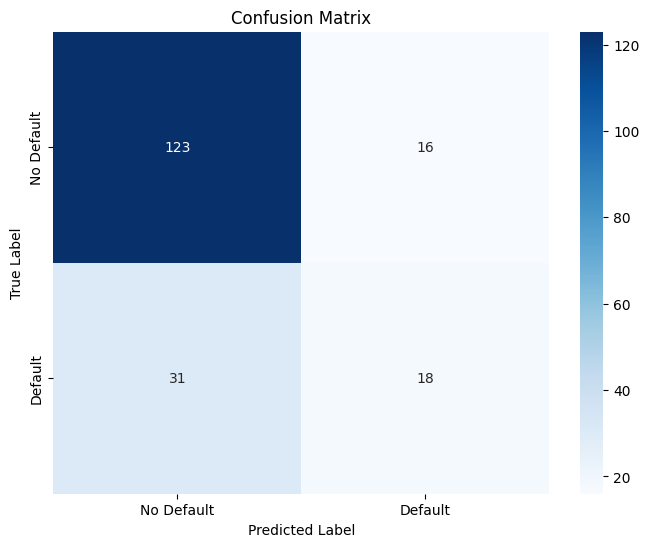

In [ ]:
# Classification report and confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
# Display classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       139
           1       0.53      0.37      0.43        49

    accuracy                           0.75       188
   macro avg       0.66      0.63      0.64       188
weighted avg       0.73      0.75      0.73       188



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


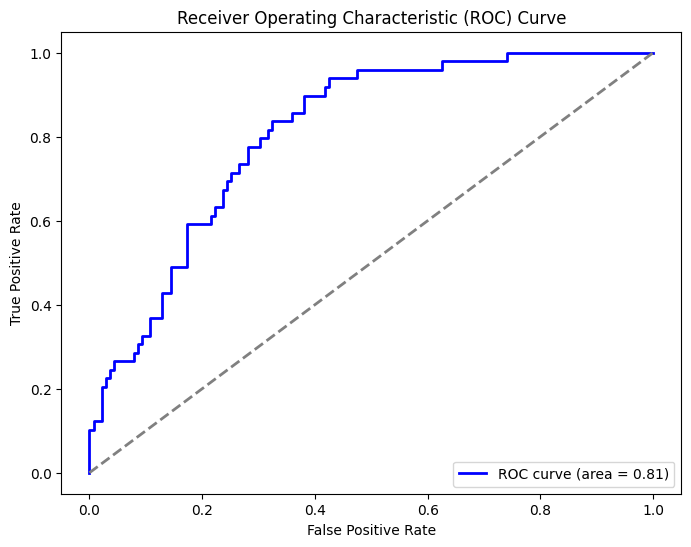

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the processed data to a new file
processed_file_path = 'Processed_LoanData.csv'
cleaned_data.to_csv(processed_file_path, index=False)

print(f"Processed data saved to {processed_file_path}")

Processed data saved to Processed_LoanData.csv


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Example: Create binary columns based on certain thresholds
binary_data = cleaned_data.copy()
binary_data['high_income'] = (binary_data['income'] > binary_data['income'].median()).astype(int)
binary_data['high_debtinc'] = (binary_data['debtinc'] > binary_data['debtinc'].median()).astype(int)
binary_data['high_creddebt'] = (binary_data['creddebt'] > binary_data['creddebt'].median()).astype(int)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply the Apriori algorithm to find frequent itemsets with a minimum support threshold of 0.1
frequent_itemsets = apriori(binary_data[['high_income', 'high_debtinc', 'high_creddebt']], min_support=0.1, use_colnames=True)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Generate association rules with a minimum confidence threshold of 0.7
association_rules_df = association_rules(frequent_itemsets, num_itemsets=2 ,metric="confidence", min_threshold=0.7)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Display the frequent itemsets and association rules
print("\nFrequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(association_rules_df)


Frequent Itemsets:
    support                                    itemsets
0  0.490385                               (high_income)
1  0.500000                              (high_debtinc)
2  0.500000                             (high_creddebt)
3  0.238782                 (high_income, high_debtinc)
4  0.326923                (high_income, high_creddebt)
5  0.366987               (high_creddebt, high_debtinc)
6  0.211538  (high_income, high_creddebt, high_debtinc)

Association Rules:
                   antecedents      consequents  antecedent support  \
0              (high_creddebt)   (high_debtinc)            0.500000   
1               (high_debtinc)  (high_creddebt)            0.500000   
2  (high_income, high_debtinc)  (high_creddebt)            0.238782   

   consequent support   support  confidence      lift  representativity  \
0                 0.5  0.366987    0.733974  1.467949               1.0   
1                 0.5  0.366987    0.733974  1.467949               1.0   
2 

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
